In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import scipy
from scipy import fft as fft
from sklearn.linear_model import LinearRegression

<p style='text-align: justify;'> In Hubbard model, in order to write our Hamiltonina in terms of composite operators we should be able to write hopping function as exponential series of either real (laplace) or imaginary (fourier) exponents. We assume that the hopping term is only a function of distance between spins ($t_{r}$). </p>
 

## Fourier Expansion

In [2]:
def fourier_expansion(r,L,n,function):
    
    fourier = scipy.fft.fft(function(r))
    approx_func = np.zeros(L,dtype = complex)
    k = (2*math.pi)/L * np.arange(L)
    
    for l in range(L):
        fourier_values = fourier * np.exp(1j * l * k)
        indices = np.argsort(abs(fourier_values))[::-1]
        fourier_values = fourier_values[indices]
        approx_func[l] = 1/L * np.sum(fourier_values[:n])
    return approx_func

In [3]:
N = 200 #Number of spins

### 1) $t_{r} = \frac{1}{r}$

Text(0.5, 0, 'r')

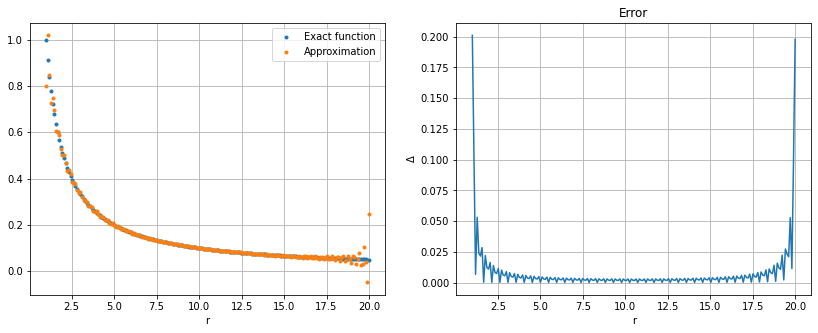

In [4]:
r = np.linspace(1,20,N)
n = 120 #Number of kept coeficients
f = lambda r:1/r
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 2) $t_{r} = \frac{1}{r^2 + a^2}$

Text(0.5, 0, 'r')

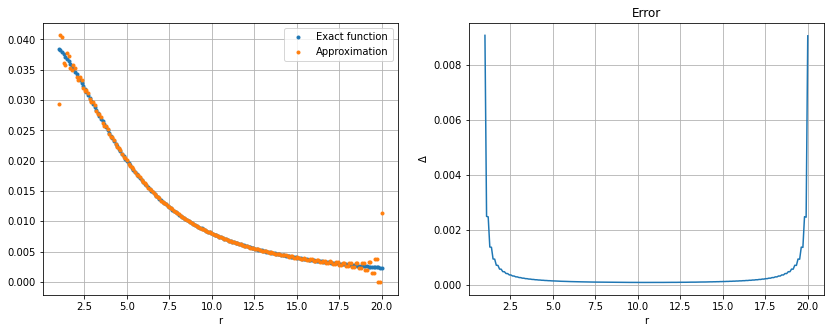

In [5]:
r = np.linspace(1,20,N)
n = 100 #Number of kept coeficients
a = 5
f = lambda r:1/(r**2+a**2)
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 3) $t_{r} = \frac{1}{r^2} + a^2$

Text(0.5, 0, 'r')

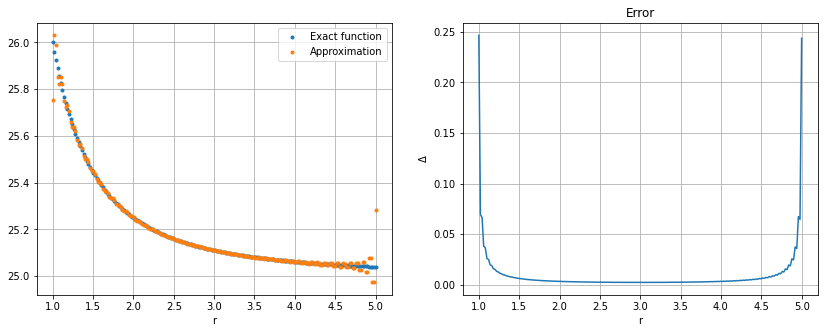

In [6]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
a = 5
f = lambda r:(1/(r**2)) + a**2
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 3) $t_{r} = \frac{1}{(r + a)^3}$

Text(0.5, 0, 'r')

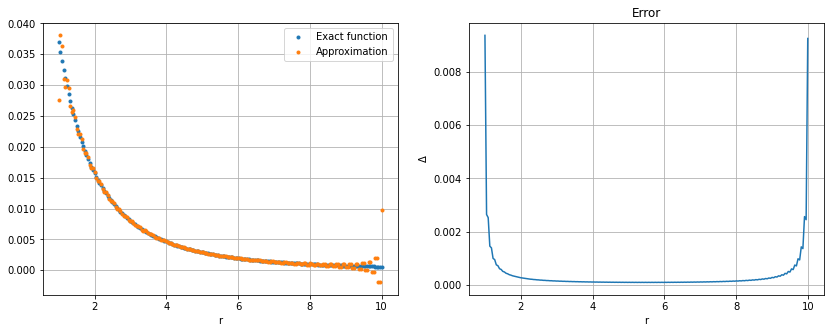

In [7]:
r = np.linspace(1,10,N)
n = 100 #Number of kept coeficients
a = 2
f = lambda r:1/(r+a)**3
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 4) $t_{r} = \frac{{e^{-r}}}{r}$

Text(0.5, 0, 'r')

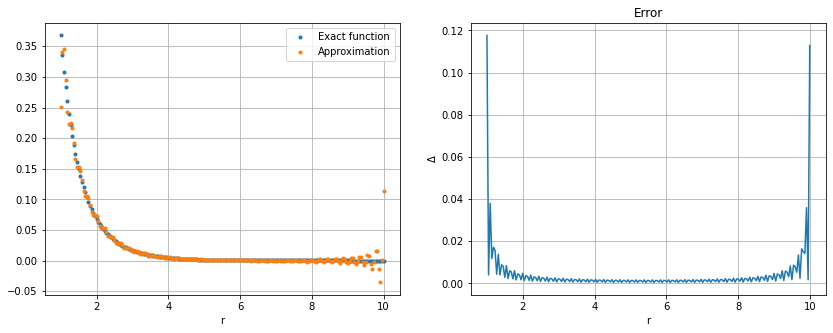

In [8]:
r = np.linspace(1,10,N)
f = lambda r:np.exp(-r)/r
n = 80 #Number of kept coeficients

approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 5) $t_{r} = \frac{{e^{-r^2}}}{r} + a^2$

Text(0.5, 0, 'r')

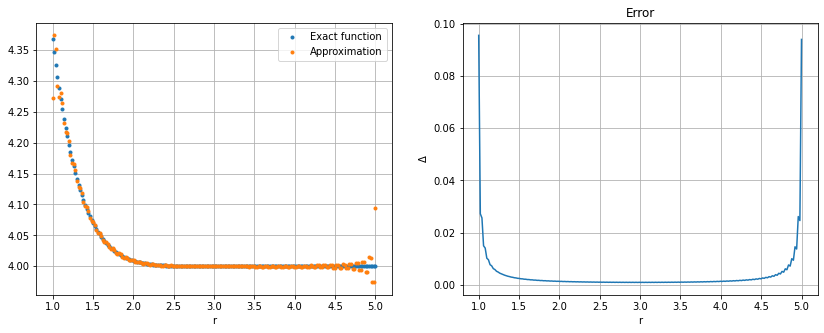

In [9]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
a = 2
f = lambda r:(np.exp(-r**2)/r) + a**2
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 6) $t_{r} = \frac{{e^{-ar^2}}}{r}$

Text(0.5, 0, 'r')

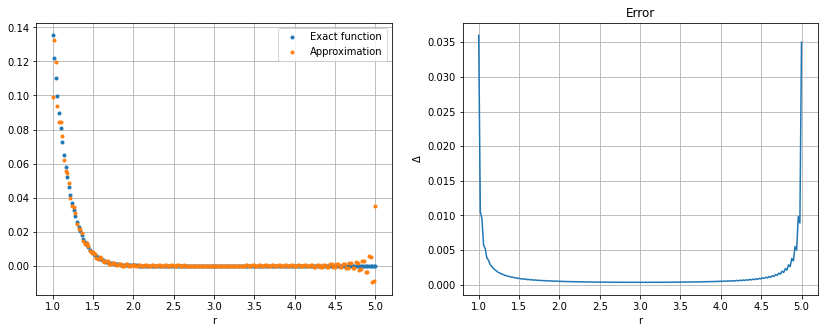

In [10]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
a = 2
f = lambda r:np.exp(-a*r**2)/r
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 7) $t_{r} ={e^{-(r-r_{0})}}$

Text(0.5, 0, 'r')

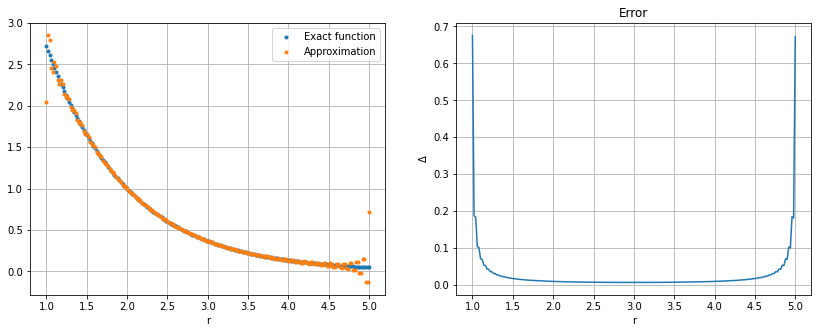

In [11]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
r0 = 2
f = lambda r:np.exp(-(r - r0))
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 8) $t_{r} = \frac{{e^{-r^2}}}{a^2} $

Text(0.5, 0, 'r')

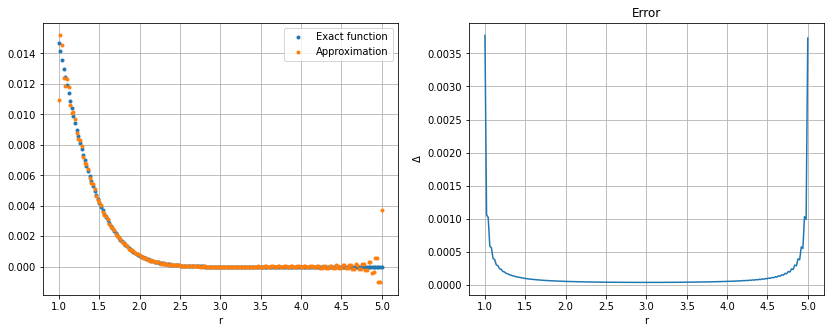

In [12]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
a = 5

f = lambda r:np.exp(-r**2)/a**2
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

### 9) $t_{r} = a cos(r) + b sin(r) $

In [13]:
r = np.linspace(1,5,N)
n = 100 #Number of kept coeficients
a = 5
b = 3
f = lambda r:a*np.cos(r) + b*np.sin(r)

Text(0.5, 0, 'r')

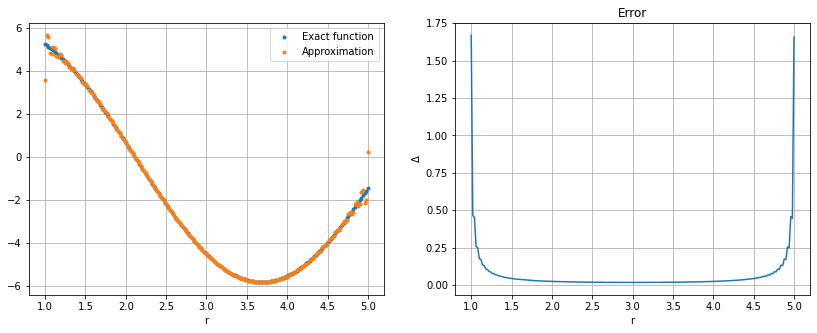

In [14]:
approx = fourier_expansion(r,N,n,f)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,f(r),'.',label = 'Exact function') #1/x
axes[0].plot(r,np.real(approx),'.',label = 'Approximation')
axes[0].grid('on') 
axes[0].legend()
axes[0].set_xlabel('r')
error = abs(f(r) - approx)
axes[1].plot(r,error)
axes[1].grid('on')
axes[1].set_title('Error')
axes[1].set_ylabel('$\Delta$')
axes[1].set_xlabel('r')

# Laplace expansion

In [15]:
def laplace_expansion(r,L,n,func,Lambda):
    
    r = r #array of r_i values
    function = func #original function
    Lambda = Lambda #array of different lambda_i values
    approx_func = np.zeros(L) #approimation with laplace expanxion
    f_x = np.zeros(L) 
    error = np.zeros(L)

    #matrix for all xi
    X = np.zeros((L,n))
    for i in range(n):
        X[:,i] = np.transpose(np.exp(-Lambda[i]*r))
        
    Y = function(r).reshape((L,1))
    LR = LinearRegression()
    LR.fit(X,Y)
    
    for l in range(L):
        x_i = np.exp(-Lambda*r[l]).reshape((1,n))
        y_i = function(r[l])
        y_pred = LR.predict(x_i)
        Error = abs(y_i - y_pred)
        f_x[l] = y_i
        approx_func[l] = y_pred
        error[l] = Error
        
    return f_x,approx_func,error

### 1) $t_{r} = \frac{1}{r}$

Text(0.5, 1.0, 'error')

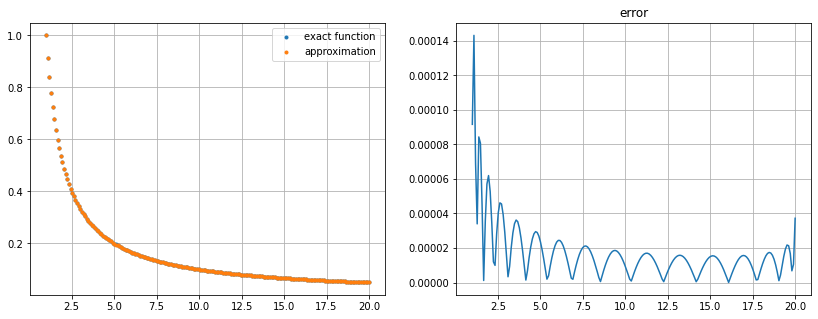

In [16]:
r = np.linspace(1,20,N)
n = 15
init = 0.01
final = 1
Lambda = np.linspace(init,final,n)
f = lambda x:1/x

real_func,approx_func,err = laplace_expansion(r,N,n,f,Lambda)
fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 2) $t_{r} = \frac{1}{r^2 + a^2}$

Text(0.5, 1.0, 'error')

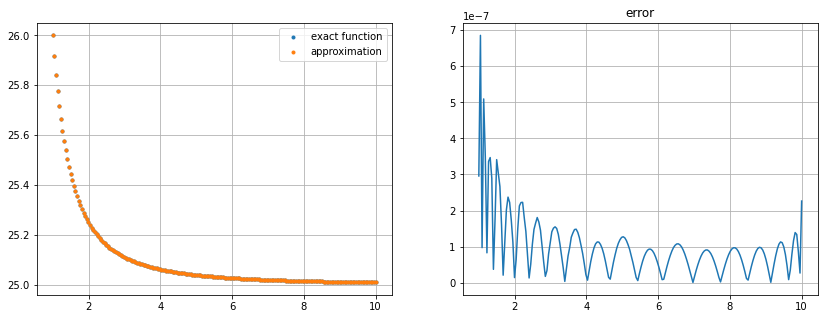

In [17]:
r = np.linspace(1,10,N)
n = 20
init = 0.1
final = 3
Lambda = np.linspace(init,final,n)
a = 5
f = lambda r:(1/(r**2)) + a**2

real_func,approx_func,err = laplace_expansion(r,N,n,f,Lambda)
fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 3) $t_{r} = \frac{1}{(r + a)^3}$

Text(0.5, 1.0, 'error')

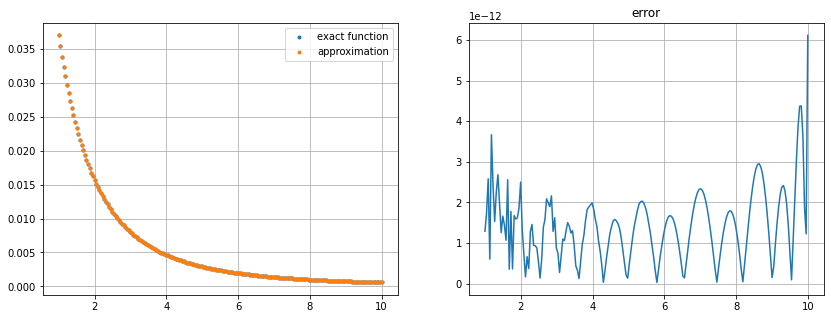

In [18]:
r = np.linspace(1,10,N)
n = 20
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
a = 2
f = lambda r:1/(r+a)**3

real_func,approx_func,err = laplace_expansion(r,N,n,f,Lambda)
fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 4) $t_{r} = \frac{{e^{-r}}}{r}$

Text(0.5, 1.0, 'error')

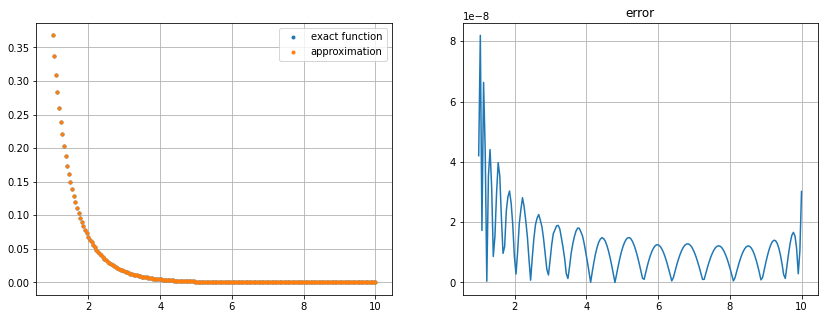

In [19]:
r = np.linspace(1,10,N)
n = 20
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
a = 2
f = lambda r:np.exp(-r)/r

real_func,approx_func,err = laplace_expansion(r,N,n,f,Lambda)
fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 5) $t_{r} = \frac{{e^{-r^2}}}{r} + a^2$

Text(0.5, 1.0, 'error')

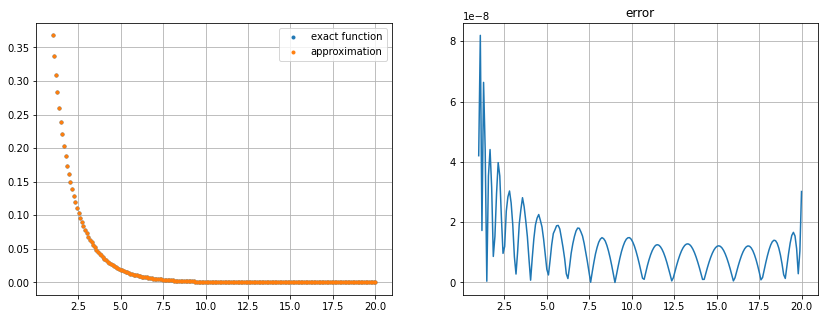

In [20]:
r = np.linspace(1,20,N)
n = 20
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
a = 2

f = lambda r:(np.exp(-r**2)/r) + a**2

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 6) $t_{r} = \frac{{e^{-ar^2}}}{r}$

Text(0.5, 1.0, 'error')

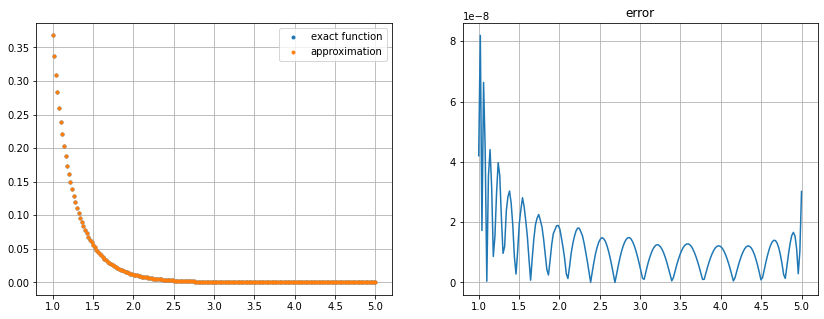

In [21]:
r = np.linspace(1,5,N)
n = 20
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
a = 5

f = lambda r:np.exp(-a*r**2)/r

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 7) $t_{r} ={e^{-(r-r_{0})}}$

Text(0.5, 1.0, 'error')

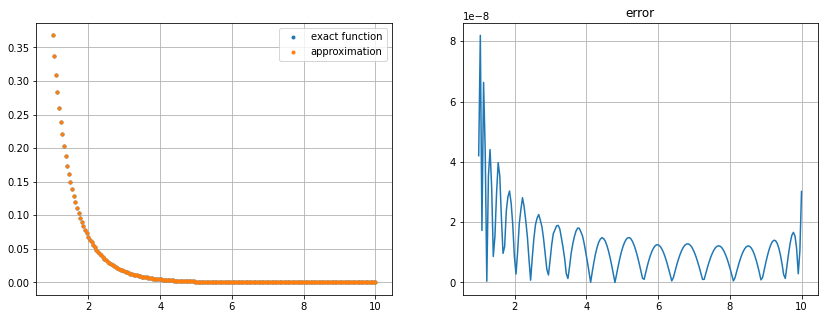

In [22]:
r = np.linspace(1,10,N)
n = 20
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
r0 = 2
f = lambda r:np.exp(-(r - r0))

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')

### 8) $t_{r} = \frac{{e^{-r^2}}}{a^2} $

Text(0.5, 1.0, 'error')

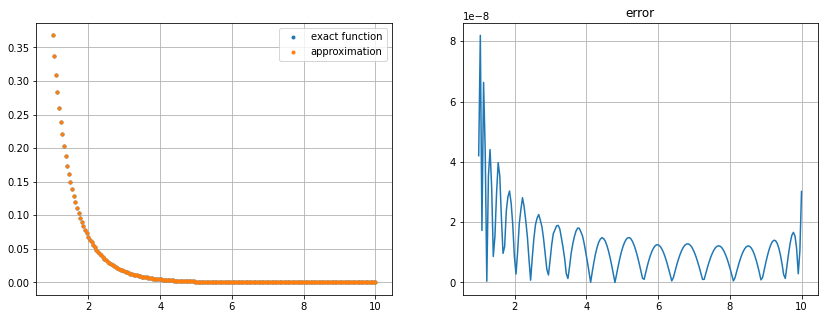

In [23]:
r = np.linspace(1,10,N)
n = 15
init = 0.5
final = 3
Lambda = np.linspace(init,final,n)
a = 5
f = lambda r:np.exp(-r**2)/a**2

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].plot(r,real_func,'.',label = 'exact function') #1/x
axes[0].plot(r,approx_func,'.',label = 'approximation')
axes[0].grid('on') 
axes[0].legend()
axes[1].plot(r,err)
axes[1].grid('on')
axes[1].set_title('error')